# Demonstration of the YODA 2D plotting API

In [ ]:
# Temporary imports to access the yoda_plot2d file
import sys
sys.path.append('..')

In [4]:
# Actual imports that will be used
import yoda_plot2d as yp
import yoda
import matplotlib.pyplot as plt
import numpy as np

## Create example data (not part of demo)

In [18]:
rng = np.random.default_rng(seed=1)
nevents = 10_000
h1, h2 = yoda.Histo2D(10, -1, 5, 20, -2, 3), yoda.Histo2D(10, -1, 5, 20, -2, 3)

for h in (h1, h2):
    for event in rng.normal(1.5, 1, size=(nevents, 2)):
        h.fill(event[0], event[1])

h1, h2 = h1.mkScatter(), h2.mkScatter()
print(f'{h1 = }, {h2 = }')

h1 = <Scatter3D '/' 200 points>, h2 = <Scatter3D '/' 200 points>


The yoda plotting API only handles Scatter objects. As such, one has to call `h.mkScatter` to convert a 2D histogram into a Scatter object.

## Basic plot
The most simple plot can be created by just passing in the histogram into a plotting function.
The plotting functions intentionally have short names to make it easy to use them to analyze histograms.

### Projection plot
`proj` creates a projection of a 2D histogram, with color acting as the 3rd dimension.
By default, a colorbar is added.

(<matplotlib.collections.QuadMesh at 0x7fd4a9e587c0>,
 <matplotlib.colorbar.Colorbar at 0x7fd4a9e3c6a0>)

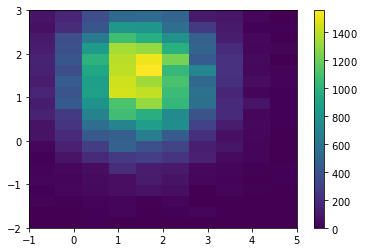

In [14]:
yp.proj(h)

### Surface plot
Another way to visualize a histogram is by using `surf`, which create a surface plot.

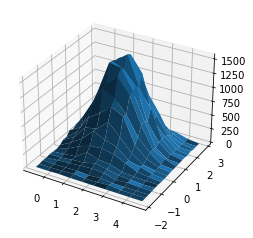

In [15]:
yp.surf(h)

### Ratio plots
One can also plot ratios between 2 histograms using `ratio_proj` and `ratio_surf`

../yoda_plot2d.py:236: RuntimeWarning: divide by zero encountered in true_divide
  z_ratio = main_z / ref_z
../yoda_plot2d.py:236: RuntimeWarning: invalid value encountered in true_divide
  z_ratio = main_z / ref_z


(<matplotlib.collections.QuadMesh at 0x7fd4a81f6b80>,
 <matplotlib.colorbar.Colorbar at 0x7fd4a8201250>)

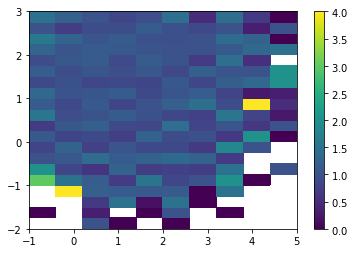

In [19]:
yp.ratio_proj(h1, h2)

../yoda_plot2d.py:358: RuntimeWarning: divide by zero encountered in true_divide
  z = main_z / ref_z
../yoda_plot2d.py:358: RuntimeWarning: invalid value encountered in true_divide
  z = main_z / ref_z
../yoda_plot2d.py:385: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  im = ax.plot_surface(x, y, z, cmap=cmap, **psurf_kw)
/home/simon/miniconda3/lib/python3.9/site-packages/mpl_toolkits/mplot3d/axes3d.py:1703: RuntimeWarning: invalid value encountered in subtract
  v1 = polygons[..., i1, :] - polygons[..., i2, :]
/home/simon/miniconda3/lib/python3.9/site-packages/mpl_toolkits/mplot3d/axes3d.py:1704: RuntimeWarning: invalid value encountered in subtract
  v2 = polygons[..., i2, :] - polygons[..., i3, :]
/home/simon/miniconda3/lib/python3.9/site-packages/numpy/core/numeric.py:1661: RuntimeWarning: invalid value encountered in multiply
  tmp = array(a2 * b1)
/home/simon/miniconda3/lib/python3.9/site-packages/numpy/core/numeric.py:1664: RuntimeWarning: invali

/home/simon/miniconda3/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


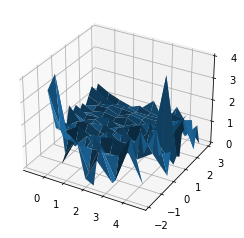

In [20]:
yp.ratio_surf(h1, h2)

The warnings raised when running these functions are due to the fact that some bins have 0 counts, which results in division by zero. 
These bins will typically not be rendered, as can be seen with the white spaces in the projection plot. 
The same should be the case for the surface plot, although it is harder to see. 

## Plotting options
One can also customize the look of the plots by passing additional arguments to the plotting functions.
This is what Rivet uses for many of its customizations to the look of the plots. 

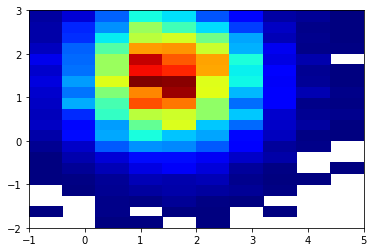

In [24]:
fig, ax = plt.subplots()
yp.proj(
    h2, 
    ax=ax,              # Specify custom Axes object in which the plot will be drawn
    showzero=False,     # Do not color the 0-count bins
    colorbar=False,     # Do not plot the colorbar
    cmap='jet'          # Change colormap
)

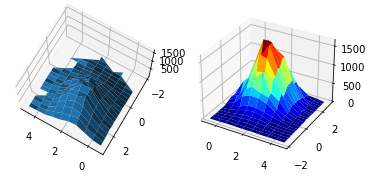

In [42]:
fig, axes = plt.subplots(ncols=2, subplot_kw=dict(projection='3d')) # projection='3d' must be used here!
yp.surf(
    h2, 
    ax=axes[0],
    elev=70,        # Elevation rotation of the "camera"
    azim=120,       # Azimuthal rotation of the "camera"
    showzero=False  # Not recommended for plot_surface
)

yp.surf(
    h2, 
    ax=axes[1],
    cmap='jet'      # Color matches the z values
)

Note
----
`plot_surface` does not officially support NaN values, and can therefore cause unexpected results. This might however be solved soon, thanks to [this pull request](https://github.com/matplotlib/matplotlib/pull/20725/).

A full list of all parameters that the functions accept can be found in the docstring, which can e.g. be shown with
```python
yp.proj?
```
in IPython and jupyter notebooks, or 
```python
help(yp.proj)
```
when using Python anywhere.

## Axis customization
One can also customize the look of the x, y, and z axis with a unified API for both projection plots and surface plots.
Axis formatting can be passed to the plotting functions via `xaxis_kw`, `yaxis_kw`, `zaxis_kw`, which should be dicts with keywords.
These keywords are in turn passed to `format_axis`, which can also be used on its own (although using it via the plotting functions is typically more convenient).
The docstring for `format_axis` contains more information about which parameters it accepts.

In [43]:
# TODO add example of *axis_kw and format_axis

## Further customization using matplotlib
The return values from the yoda plotting functions are the artist objects created by matplotlib. If desired, one can therefore fully customize the plot using matplotlib, while also using the yoda plotting API.

In [44]:
# TODO add example of this